<a href="https://colab.research.google.com/github/marco-milanesi/FPGA-based-Digital-Twin/blob/main/plot/plot_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/marco-milanesi/FPGA-based-Digital-Twin/main/plot/datasetFaultFLatControAction.txt

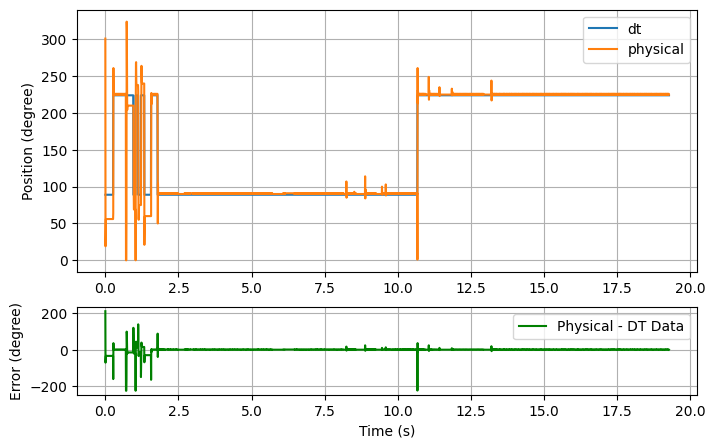

In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read the data from the file
data = pd.read_csv('datasetFaultFLatControAction.txt', delim_whitespace=True, header=None, names=['physical', 'error', 'dt_data', 'realMV', 'dtMV'])

# Create a time vector with a sampling time of 0.005882353
t = np.arange(len(data)) * 0.005882353

# Create a figure with two subplots, with the second subplot stretched vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), gridspec_kw={"height_ratios": [3, 1]})

# Plot the data using seaborn in the first subplot
sns.lineplot(data=data, x=t, y='dt_data', label='dt', ax=ax1)
sns.lineplot(data=data, x=t, y='physical', label='physical', ax=ax1)
ax1.set_xlabel(' ')
ax1.set_ylabel('Position (degree)')
ax1.legend()
ax1.grid()

# Compute the error and plot it using seaborn in the second subplot
data['error'] = data['physical'] - data['dt_data']
sns.lineplot(data=data, x=t, y='error', label='Physical - DT Data',color='green', ax=ax2)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Error (degree)')
ax2.grid()
ax2.legend()
plt.savefig('my_figure.pdf')
plt.show()



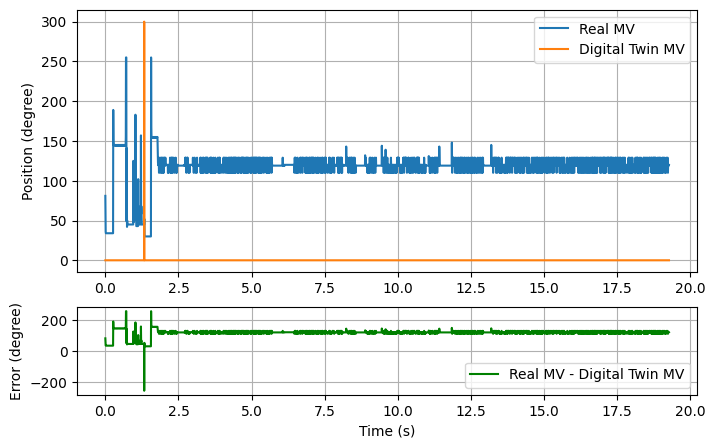

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), gridspec_kw={"height_ratios": [3, 1]})
# Plot the data using seaborn in the first subplot
sns.lineplot(data=data, x=t, y='realMV', label='Real MV', ax=ax1)
sns.lineplot(data=data, x=t, y='dtMV', label='Digital Twin MV', ax=ax1)
ax1.set_xlabel(' ')
ax1.set_ylabel('Position (degree)')
ax1.legend()
ax1.grid()

# Compute the error and plot it using seaborn in the second subplot
data['error_MV'] = data['realMV'] - data['dtMV']
sns.lineplot(data=data, x=t, y='error_MV', label='Real MV - Digital Twin MV',color='green', ax=ax2)
ax2.set_xlabel('Time (s)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Error (degree)')
ax2.grid()
ax2.legend()
plt.savefig('my_figure2.pdf')
plt.show()